In [3]:
import pandas as pd
import seaborn as sns
import sklearn as skl
import altair as alt
from sklearn.linear_model import LinearRegression

In [4]:
data = pd.read_csv("./data/Pokemon.csv")

# About the data

PokeDex index number

Name - Name of the Pokemon

Type 1 - Type of pokemon

Type 2 - Other Type of Pokemon

Total - Sum of Attack, Sp. Atk, Defense, Sp. Def, Speed and HP

HP - Hit Points

Attack - Attack Strength

Defense - Defensive Strength

Sp. Atk - Special Attack Strength

Sp. Def - Special Defensive Strength

Speed - Speed

Generation - Number of generation

Legendary - True if Legendary Pokemon False if not (more revision on mythical vs legendary needed)

# Data Description

Pokemon data preview:

In [3]:
data.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


Description of data:

In [5]:
data.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


Correlation between Pokemon Stats:

In [8]:
data.corr()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,1.000000,0.119813,0.097614,0.102298,0.094786,0.088759,0.085817,0.010733,0.982516,0.153396
Total,0.119813,1.000000,0.618748,0.736211,0.612787,0.747250,0.717609,0.575943,0.048384,0.501758
HP,0.097614,0.618748,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.058683,0.273620
Attack,0.102298,0.736211,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.051451,0.345408
Defense,0.094786,0.612787,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.042419,0.246377
Sp. Atk,0.088759,0.747250,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.036437,0.448907
Sp. Def,0.085817,0.717609,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.028486,0.363937
Speed,0.010733,0.575943,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,-0.023121,0.326715
Generation,0.982516,0.048384,0.058683,0.051451,0.042419,0.036437,0.028486,-0.023121,1.000000,0.079794
Legendary,0.153396,0.501758,0.273620,0.345408,0.246377,0.448907,0.363937,0.326715,0.079794,1.000000


Total is highly correlated with HP, Attack, Defence, Sp.Atk, Sp.Def and Speed, which we would expect since Total is made up as the sum of these variables. 

# Charts and Graphs

In [5]:
chart = alt.Chart(data)
#alt.renderers.enable('notebook') #Uncomment when using JupyterNotebook

#### Count of Pokemon Type 1:

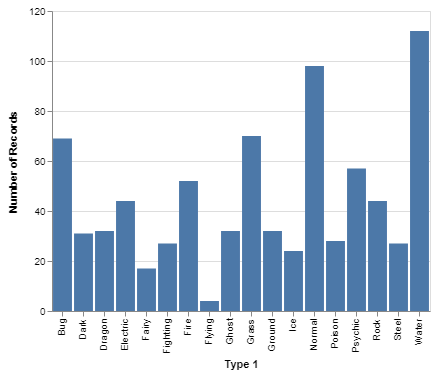

In [11]:
chart.mark_bar().encode(
    x = "Type 1",
    y = "count()"
)

The most common Type 1 Pokemon is Water, followed by Normal.

The least common Type 1 Pokemon is Flying, followed by Fairy.

#### Count of Pokemon Type 2:

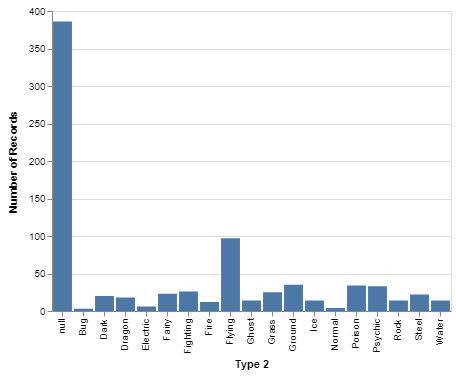

In [81]:
chart.mark_bar().encode(
    x = "Type 2",
    y = "count()"
)

It's very common for Pokemon to only have a Type 1, and not a Type 2 (null). Ignoring the Pokemon without a Type 2, Flying Type 2 is the most common.

#### Count of Pokemon Type Combinations

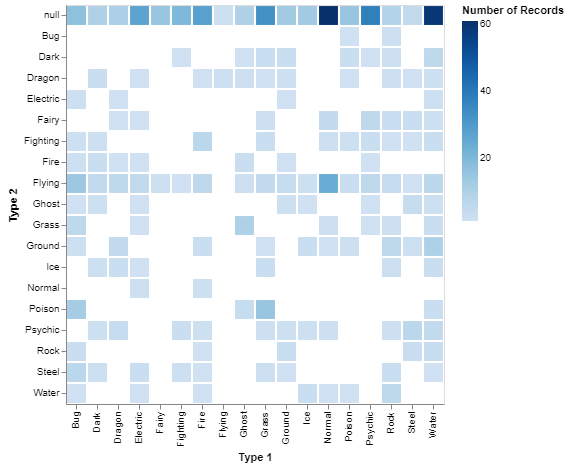

In [17]:
chart.mark_bar().encode(
    x = "Type 1",
    y = "Type 2",
    color = "count()"
)

Previously, we noted the most common Type 1 Pokemon is Water, followed by Normal. From the graph above, Type 1 Water in combination with Type 2 null is most common along with Type 1 Normal in combination with Type 2 null.

Its rare to have a Type 1 Pokemon that's Flying, followed by Fairy. It's more common to see a Type 2 Flying and a Type 2 Fairy.

#### Pokemon Types with a mean Attack greater than 140

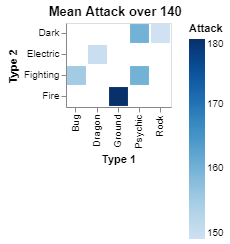

In [15]:
#Pokemon Types mean Attack
dataByMeanAttack = data.groupby(["Type 1", "Type 2"], as_index = False)[["Attack"]].mean()

#mean attack > 140
attack140 = dataByMeanAttack[dataByMeanAttack["Attack"] > 140]

#Chart mean attack over 140
alt.Chart(attack140, title = "Mean Attack over 140").mark_bar().encode(
    x = "Type 1",
    y = "Type 2",
    color = "Attack"
)


#Wanted to chart top 10% mean Attack

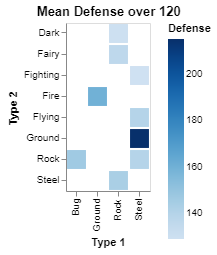

In [17]:
#Pokemon Types mean Defense
dataByMeanDefense = data.groupby(["Type 1", "Type 2"], as_index = False)[["Defense"]].mean()

#mean Defense > 120
defense120 = dataByMeanDefense[dataByMeanDefense["Defense"] > 120]

#Chart mean Defense over 120
alt.Chart(defense120, title = "Mean Defense over 120").mark_bar().encode(
    x = "Type 1",
    y = "Type 2",
    color = "Defense"
)

#Wanted to chart top 10% mean defense

#### Legendary vs Non-Legendary Pokemon

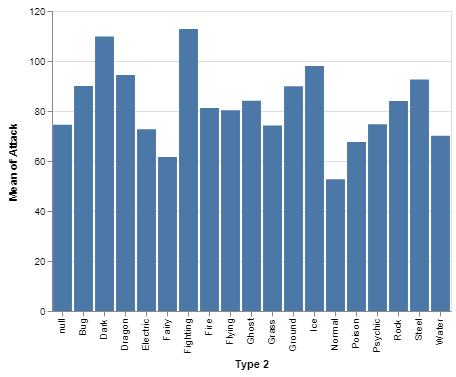

In [16]:
chart.mark_bar().encode(
    x = "Type 2",
    y = "mean(Attack)"
)

#### Type 1 and Type 2 Pokemon combinations that include Legendary or Non-Legendary Pokemons

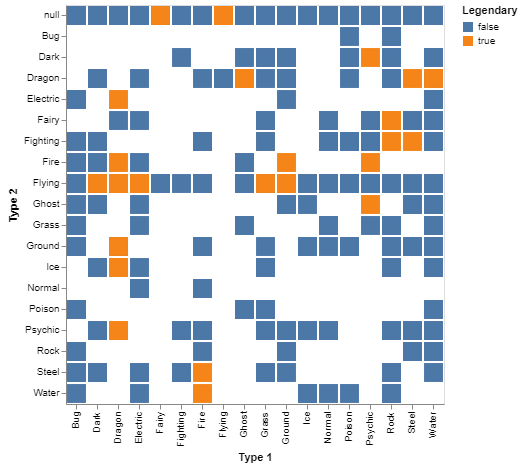

In [23]:
chart.mark_bar().encode(
    x = "Type 1",
    y = "Type 2",
    color = "Legendary"
)

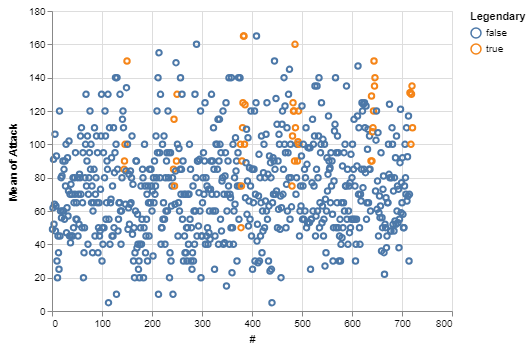

In [10]:
alt.Chart(data).mark_point().encode(
    x = "#",
    y = "mean(Attack)",
    color = "Legendary"
)

NOTE: Would like to incorporate Generation into Charts or Models

# Models

Ideas:

1) Logistic regression: Use pokemon stats to predict whether Legendary or non-legendary. Which variables determine whether Legendary?

2) Clustering (k-means): Find pokemon groups or clusters that are similar to each other. (For diversifying pokemon deck). What are the characteristic of the Pokemon clusters?

3) ???


# Code Storage

In [4]:
#List Type 1 and Type 2 Pokemon in case needed
Type1_list = list(set(data["Type 1"]))
Type2_list = list(set(data["Type 2"]))

List of pokemon for each Type:

In [5]:
print("Number of pokemons:", data["Name"].count())
print("Number Type 1 Grass pokemons:", data[data["Type 1"] == "Grass"].count()[1])
print("Number Type 1 Bug pokemons:", data[data["Type 1"] == "Bug"].count()[1])
print("Number Type 1 Dark pokemons:", data[data["Type 1"] == "Dark"].count()[1])
print("Number Type 1 Dragon pokemons:", data[data["Type 1"] == "Dragon"].count()[1])
print("Number Type 1 Grass pokemons:", data[data["Type 1"] == "Dark"].count()[1])
print("Number Type 1 Grass pokemons:", data[data["Type 1"] == "Dragon"].count()[1])

Number of pokemons: 800
Number Type 1 Grass pokemons: 70
Number Type 1 Bug pokemons: 69
Number Type 1 Dark pokemons: 31
Number Type 1 Dragon pokemons: 32
Number Type 1 Grass pokemons: 31
Number Type 1 Grass pokemons: 32
